In [2]:
#Import everything 

import pandas as pd
import numpy as np
import requests
import json
from bs4 import BeautifulSoup
import csv

import matplotlib.pyplot as plt
plt.style.use('seaborn')


#starting sentiment analysis 

import nltk
from nltk.corpus import stopwords

#Lemmatization
#Basically changing word like resturants to resturant(words to word) bc really they mean the same thing 

import textblob

from textblob import Word

from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

#Sentiment Analysis

from textblob import TextBlob

In [3]:
df = pd.read_csv('/Users/markdetiberiis/MovieMonths/sent&profit.csv')

In [4]:
df

,Unnamed: 0,tconst,primary_title,runtime_minutes,genres,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,release_month,release_day,release_year,polarity,subjectivity,total_profits
0,0,tt0249516,Foodfight,91.0,"Action,Animation,Comedy",1.9,8248,26,45000000,0,73706,Dec,31,2012,0.011111,0.416667,-44926294
1,1,tt0326592,The_Overnight,88.0,NaN,7.5,24,21,200000,1109808,1165996,Jun,19,2015,0.091607,0.588829,965996
2,2,tt3844362,The_Overnight,79.0,"Comedy,Mystery",6.1,14828,21,200000,1109808,1165996,Jun,19,2015,0.091607,0.588829,965996
3,3,tt0337692,On_the_Road,124.0,"Adventure,Drama,Romance",6.1,37886,17,25000000,720828,9313302,Mar,22,2013,0.047459,0.524222,-15686698
4,4,tt4339118,On_the_Road,89.0,Drama,6.0,6,17,25000000,720828,9313302,Mar,22,2013,0.047459,0.524222,-15686698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,2287,tt8662424,Never_Again,106.0,Drama,5.7,67,47,500000,307631,308793,Jul,12,2002,0.053102,0.655267,-191207
2288,2288,tt8976472,Never_Again,69.0,"Documentary,Music",6.6,27,47,500000,307631,308793,Jul,12,2002,0.053102,0.655267,-191207
2289,2289,tt8824064,Heroes,88.0,Documentary,7.3,7,12,400000,655538,655538,Oct,24,2008,0.077778,0.311111,255538
2290,2290,tt8976772,Push,92.0,Documentary,7.3,33,70,38000000,31811527,49678401,Feb,6,2009,0.000000,0.000000,11678401


In [10]:
df.sort_values(by = ['total_profits','genres'], ascending = False)

,Unnamed: 0,tconst,primary_title,runtime_minutes,genres,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,release_month,release_day,release_year,polarity,subjectivity,total_profits
1001,1001,tt1775309,Avatar,93.0,Horror,6.1,43,1,425000000,760507625,2776345279,Dec,18,2009,0.125000,0.386728,2351345279
1619,1619,tt2495766,Titanic,NaN,Adventure,6.2,20,43,200000000,659363944,2208208395,Dec,19,1997,0.121789,0.535103,2008208395
2014,2014,tt4154756,Avengers_Infinity_War,149.0,"Action,Adventure,Sci-Fi",8.5,670926,7,300000000,678815482,2048134200,Apr,27,2018,0.161494,0.525862,1748134200
8,8,tt0369610,Jurassic_World,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,215000000,652270625,1648854864,Jun,12,2015,-0.026602,0.422727,1433854864
1719,1719,tt2820852,Furious_7,137.0,"Action,Crime,Thriller",7.2,335074,67,190000000,353007020,1518722794,Apr,3,2015,0.181524,0.506413,1328722794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,1607,tt2479478,The_Ridiculous_6,119.0,"Comedy,Western",4.8,38694,52,60000000,0,0,Dec,11,2015,-0.111797,0.536941,-60000000
163,163,tt1041804,The_Nutcracker_in_3D,110.0,"Action,Family,Fantasy",4.3,3119,79,90000000,195459,20466016,Nov,24,2010,0.003931,0.572087,-69533984
2157,2157,tt5519340,Bright,117.0,"Action,Crime,Fantasy",6.4,147834,80,90000000,0,0,Dec,13,2017,0.141213,0.572300,-90000000
367,367,tt1305591,Mars_Needs_Moms,88.0,"Adventure,Animation,Family",5.4,19823,94,150000000,21392758,39549758,Mar,11,2011,0.209848,0.532359,-110450242


In [ ]:
#need to group by genre and display total profits for each 

In [24]:
y = df.genres[0]
y

'Action,Animation,Comedy'

In [34]:
print(y)

Action,Animation,Comedy


In [28]:
df.dtypes


Unnamed: 0             int64
tconst                object
primary_title         object
runtime_minutes      float64
genres                object
averagerating        float64
numvotes               int64
id                     int64
production_budget      int64
domestic_gross         int64
worldwide_gross        int64
release_month         object
release_day            int64
release_year           int64
polarity             float64
subjectivity         float64
total_profits          int64
dtype: object

In [55]:
#collect number of movies in each genre 

Action = df['genres'].str.contains('Action').sum()
Animation = df['genres'].str.contains('Animation').sum()
Comedy = df['genres'].str.contains('Comedy').sum()
Mystery = df['genres'].str.contains('Mystery').sum()
Adventure  = df['genres'].str.contains('Adventure').sum()
Drama  = df['genres'].str.contains('Drama').sum()
Romance = df['genres'].str.contains('Romance').sum()
Music  = df['genres'].str.contains('Music').sum()
Documentary = df['genres'].str.contains('Documentary').sum()
Biography = df['genres'].str.contains('Biography').sum()


In [62]:
#Show number of movies in each genre 

print('There are {} Action Movies'.format(Action))
print('There are {} Animation Movies'.format(Animation))
print('There are {} Comedy Movies'.format(Comedy))
print('There are {} Mystery Movies'.format(Mystery))
print('There are {} Adventure Movies'.format(Adventure))
print('There are {} Drama Movies'.format(Drama))
print('There are {} Romantic Movies'.format(Romance))
print('There are {} Music Movies'.format(Music))
print('There are {} Documentary Movies'.format(Documentary))
print('There are {} Biographical Movies'.format(Biography))

There are 500 Action Movies
There are 110 Animation Movies
There are 617 Comedy Movies
There are 181 Mystery Movies
There are 361 Adventure Movies
There are 1196 Drama Movies
There are 261 Romantic Movies
There are 74 Music Movies
There are 161 Documentary Movies
There are 168 Biographical Movies


In [96]:
billion_earning_df = df[(df['total_profits'] > 1000000000)]

In [97]:
billion_earning_df.head(100)

,Unnamed: 0,tconst,primary_title,runtime_minutes,genres,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,release_month,release_day,release_year,polarity,subjectivity,total_profits
8,8,tt0369610,Jurassic_World,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,215000000,652270625,1648854864,Jun,12,2015,-0.026602,0.422727,1433854864
364,364,tt1300854,Iron_Man_3,130.0,"Action,Adventure,Sci-Fi",7.2,692794,48,200000000,408992272,1215392272,May,3,2013,0.168221,0.526852,1015392272
388,388,tt1323045,Frozen,93.0,"Adventure,Drama,Sport",6.2,62311,56,150000000,400738009,1272469910,Nov,22,2013,0.500000,0.522222,1122469910
390,390,tt2294629,Frozen,102.0,"Adventure,Animation,Comedy",7.5,516998,56,150000000,400738009,1272469910,Nov,22,2013,0.500000,0.522222,1122469910
1001,1001,tt1775309,Avatar,93.0,Horror,6.1,43,1,425000000,760507625,2776345279,Dec,18,2009,0.125000,0.386728,2351345279
1062,1062,tt1825683,Black_Panther,134.0,"Action,Adventure,Sci-Fi",7.3,516148,42,200000000,700059566,1348258224,Feb,16,2018,-0.061905,0.600952,1148258224
1470,1470,tt2293640,Minions,91.0,"Adventure,Animation,Comedy",6.4,193917,73,74000000,336045770,1160336173,Jul,10,2015,0.270517,0.634412,1086336173
1495,1495,tt2316801,Beauty_and_the_Beast,112.0,"Drama,Fantasy,Romance",6.4,18100,35,160000000,504014165,1259199706,Mar,17,2017,0.000000,0.000000,1099199706
1497,1497,tt2771200,Beauty_and_the_Beast,129.0,"Family,Fantasy,Musical",7.2,238325,35,160000000,504014165,1259199706,Mar,17,2017,0.000000,0.000000,1099199706
1565,1565,tt2395427,Avengers_Age_of_Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594,4,330600000,459005868,1403013963,May,1,2015,0.183742,0.453969,1072413963


In [98]:
billion_earning_df = billion_earning_df[billion_earning_df.tconst != 'tt1323045']
billion_earning_df = billion_earning_df[billion_earning_df.tconst != 'tt1611845']
billion_earning_df = billion_earning_df[billion_earning_df.tconst != 'tt2316801']

In [99]:
billion_earning_df.sort_values(by = 'total_profits', ascending = False)

,Unnamed: 0,tconst,primary_title,runtime_minutes,genres,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,release_month,release_day,release_year,polarity,subjectivity,total_profits
1001,1001,tt1775309,Avatar,93.0,Horror,6.1,43,1,425000000,760507625,2776345279,Dec,18,2009,0.125000,0.386728,2351345279
1619,1619,tt2495766,Titanic,NaN,Adventure,6.2,20,43,200000000,659363944,2208208395,Dec,19,1997,0.121789,0.535103,2008208395
2014,2014,tt4154756,Avengers_Infinity_War,149.0,"Action,Adventure,Sci-Fi",8.5,670926,7,300000000,678815482,2048134200,Apr,27,2018,0.161494,0.525862,1748134200
8,8,tt0369610,Jurassic_World,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,215000000,652270625,1648854864,Jun,12,2015,-0.026602,0.422727,1433854864
1719,1719,tt2820852,Furious_7,137.0,"Action,Crime,Thriller",7.2,335074,67,190000000,353007020,1518722794,Apr,3,2015,0.181524,0.506413,1328722794
1062,1062,tt1825683,Black_Panther,134.0,"Action,Adventure,Sci-Fi",7.3,516148,42,200000000,700059566,1348258224,Feb,16,2018,-0.061905,0.600952,1148258224
2106,2106,tt4881806,Jurassic_World_Fallen_Kingdom,128.0,"Action,Adventure,Sci-Fi",6.2,219125,13,170000000,417719760,1305772799,Jun,22,2018,-0.001667,0.435667,1135772799
390,390,tt2294629,Frozen,102.0,"Adventure,Animation,Comedy",7.5,516998,56,150000000,400738009,1272469910,Nov,22,2013,0.500000,0.522222,1122469910
1497,1497,tt2771200,Beauty_and_the_Beast,129.0,"Family,Fantasy,Musical",7.2,238325,35,160000000,504014165,1259199706,Mar,17,2017,0.000000,0.000000,1099199706
1470,1470,tt2293640,Minions,91.0,"Adventure,Animation,Comedy",6.4,193917,73,74000000,336045770,1160336173,Jul,10,2015,0.270517,0.634412,1086336173


In [100]:
#collect number of movies in each genre 

ActionB = billion_earning_df['genres'].str.contains('Action').sum()
AnimationB = billion_earning_df['genres'].str.contains('Animation').sum()
ComedyB = billion_earning_df['genres'].str.contains('Comedy').sum()
MysteryB = billion_earning_df['genres'].str.contains('Mystery').sum()
AdventureB  = billion_earning_df['genres'].str.contains('Adventure').sum()
DramaB  = billion_earning_df['genres'].str.contains('Drama').sum()
RomanceB = billion_earning_df['genres'].str.contains('Romance').sum()
MusicB  = billion_earning_df['genres'].str.contains('Music').sum()
DocumentaryB = billion_earning_df['genres'].str.contains('Documentary').sum()
BiographyB = billion_earning_df['genres'].str.contains('Biography').sum()

In [101]:
#Show how many Billion $$ movies are of each genre 

print('There are {} Billion Dollar grossing Action Movies'.format(ActionB))
print('There are {} Billion Dollar grossing Animation Movies'.format(AnimationB))
print('There are {} Billion Dollar grossing Comedy Movies'.format(ComedyB))
print('There are {} Billion Dollar grossing Mystery Movies'.format(MysteryB))
print('There are {} Billion Dollar grossing Adventure Movies'.format(AdventureB))
print('There are {} Billion Dollar grossing Drama Movies'.format(DramaB))
print('There are {} Billion Dollar grossing Romantic Movies'.format(RomanceB))
print('There are {} Billion Dollar grossing Music Movies'.format(MusicB))
print('There are {} Billion Dollar grossing Documentary Movies'.format(DocumentaryB))
print('There are {} Billion Dollar grossing Biographical Movies'.format(BiographyB))

There are 8 Billion Dollar grossing Action Movies
There are 3 Billion Dollar grossing Animation Movies
There are 2 Billion Dollar grossing Comedy Movies
There are 0 Billion Dollar grossing Mystery Movies
There are 10 Billion Dollar grossing Adventure Movies
There are 0 Billion Dollar grossing Drama Movies
There are 0 Billion Dollar grossing Romantic Movies
There are 1 Billion Dollar grossing Music Movies
There are 0 Billion Dollar grossing Documentary Movies
There are 0 Billion Dollar grossing Biographical Movies


In [ ]:
#Action and Adventure movies make up huge percentage of billion dollar movies 


In [112]:
genresB = {'Action': [ActionB], "Animation": AnimationB, "Comedy": ComedyB,"Myster": MysteryB, "Adventure": AdventureB,"Drama": DramaB, "Romantic": RomanceB, "Music": MusicB, "Documentary": DocumentaryB, "Biography": BiographyB}

genre_df = pd.DataFrame(genresB)

In [106]:
genre_df['count'] = Action

In [113]:
genre_df

,Action,Animation,Comedy,Myster,Adventure,Drama,Romantic,Music,Documentary,Biography
0,8,3,2,0,10,0,0,1,0,0


In [117]:
genre_df = genre_df.T

genre_df.to_csv('/Users/markdetiberiis/MovieMonths/billion_by_genre.csv')

In [157]:
g_df = pd.read_csv('/Users/markdetiberiis/MovieMonths/billion_by_genre.csv')

In [158]:
#g_df = g_df.T

In [159]:
g_df

,Unnamed: 0,Action,Animation,Comedy,Myster,Adventure,Drama,Romantic,Music,Documentary,Biography
0,0,8,3,2,0,10,0,0,1,0,0


In [161]:
#get rid of that un names column

g_df.drop(['Unnamed: 0'], axis = 1, inplace = True)


In [166]:
g_df = g_df.T

In [167]:
y = g_df[0]

x = y.index


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

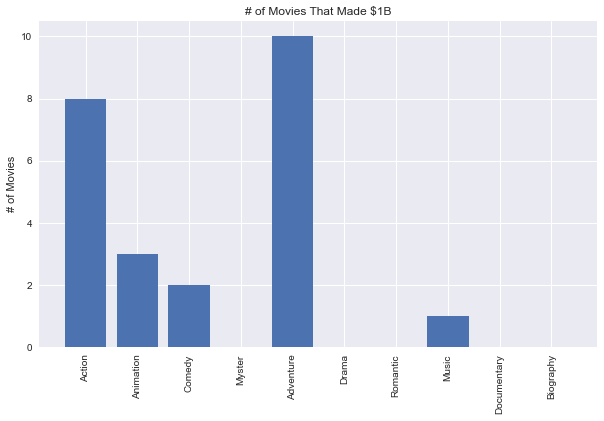

In [180]:
fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x,y)

ax.set_title('# of Movies That Made $1B')
#ax.set_xlabel('Genre')
ax.set_ylabel('# of Movies')
plt.xticks(rotation=90)

